## 8.2. Odev_Proje 2 verisi

#### Ev fiyatlarinin tahmin edilmesi: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

from statsmodels.tsa.stattools import acf

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from scipy.stats import bartlett
from scipy.stats import levene

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',200)

import warnings
warnings.filterwarnings(action='ignore')

baslik_font = {'family': 'arial', 'color':'darkred', 'weight':'bold', 'size': 13}
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [2]:
ev = pd.read_csv('house_prices_train.csv')
ev.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# oncelikleri evlerin insa edilme ve tamir edilme tarihlerinden yillari hesaplayalim

ev['today'] = 2021
ev['ageBuilt'] = ev['today'] - ev['YearBuilt']
ev['ageRemod'] = ev['today'] - ev['YearRemodAdd']

In [4]:
# iliskili olabilecegini dusundugum kategorik degiskenlerimizi duzenleyelim ve korelasyon matrisimize ekleyelim

ev = pd.get_dummies(data=ev, columns=['MSZoning', 'LotShape','Utilities','SaleCondition','BldgType'])

In [14]:
X = ev[['OverallQual','ageBuilt','ageRemod','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd',
          'GarageCars','GarageArea']]
Y = ev['SalePrice']
X_egitim,X_test,Y_egitim,Y_test = train_test_split (X,Y,test_size=0.2,random_state=40)

In [15]:
from sklearn.neighbors import KNeighborsRegressor

knn1 = KNeighborsRegressor(n_neighbors=1)
knn1.fit(X_egitim,Y_egitim)
knn1.score(X_test,Y_test)

0.4992049479608154

In [17]:
komsu_sayisi = np.arange(1, 11)
egitim_kumesi_skoru = np.empty(len(komsu_sayisi))
test_kumesi_skoru = np.empty(len(komsu_sayisi))

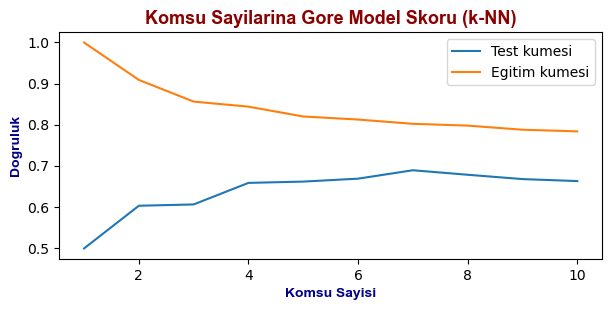

In [19]:
for i, k in enumerate(komsu_sayisi):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_egitim, Y_egitim)
    egitim_kumesi_skoru[i] = knn.score(X_egitim, Y_egitim)

    #Compute accuracy on the testing set
    test_kumesi_skoru[i] = knn.score(X_test, Y_test)

plt.figure(figsize=(7,3), dpi = 100)
plt.plot(komsu_sayisi, test_kumesi_skoru, label = 'Test kumesi')
plt.plot(komsu_sayisi, egitim_kumesi_skoru, label = 'Egitim kumesi')
plt.legend()
plt.title('Komsu Sayilarina Gore Model Skoru (k-NN)', fontdict= baslik_font)
plt.xlabel('Komsu Sayisi', fontdict= eksen_font)
plt.ylabel('Dogruluk', fontdict= eksen_font)
plt.show()

In [20]:
# yukaridaki grafige gore test kumesindeki en yuksek dogruluk tahminini 7 farkli komsuya gore elde ettik

knn7 = KNeighborsRegressor(n_neighbors=7)
knn7.fit(X_egitim,Y_egitim)
knn7.score(X_test,Y_test)

0.689264023688875

In [21]:
# Normalizasyon

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_olcekli = ss.fit_transform(X)
X_egitim_olcekli,X_test_olcekli,Y_egitim,Y_test = train_test_split(X_olcekli, Y,random_state=40,test_size=0.2)

In [23]:
# Modelimizi olceklendirdigimizde dogruluk orani 0.68 den 0.81 e cikti

knn7 = KNeighborsRegressor(n_neighbors=7)
knn7.fit(X_egitim_olcekli,Y_egitim)
knn7.score(X_test_olcekli,Y_test)

0.8108438620192151

In [24]:
# Agirliklandirma. Burada biraz daha dusuk bir dogruluk orani elde ettik

from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

knn7 = KNeighborsRegressor(n_neighbors=7, weights='distance')

X_zscore = stats.zscore(X)

X_egitim, X_test, Y_egitim, Y_test = train_test_split(X_zscore, Y, test_size=0.2, random_state = 40)

knn7.fit(X_egitim,Y_egitim)
knn7.score(X_test, Y_test)

0.8040661094869073

In [25]:
# Normalizasyon ile daha yuksek bir dogruluk oranina ulasiyoruz.